<a href="https://colab.research.google.com/github/ayushNautiyal35/ML_basic_to_advanced/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kmeans


In [1]:
from sklearn.datasets import make_blobs


In [2]:
import matplotlib.pyplot as plt

In [3]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
x.shape

(1000, 2)

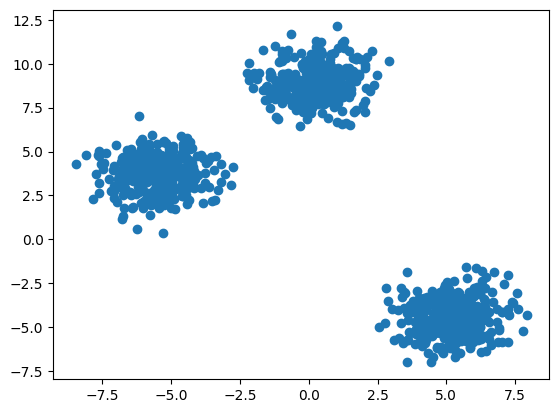

In [5]:
plt.scatter(x[:,0],x[:,1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
#elbow method
wcss=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
wcss


[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0708509383511,
 855.6538308658786,
 754.4952771647165,
 663.6773022314924,
 579.1161763099162]

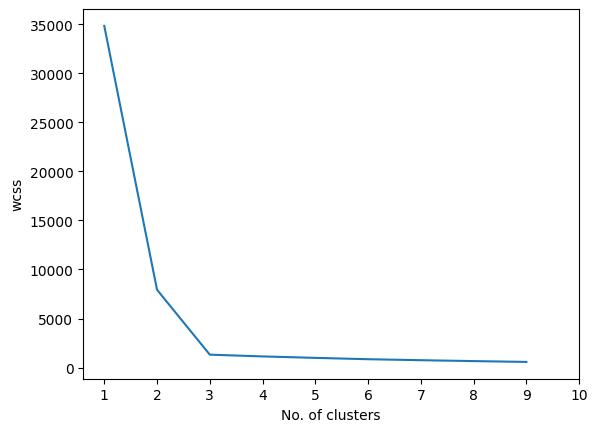

In [11]:
plt.plot(range(1,10),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of clusters")
plt.ylabel('wcss')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [13]:
y_label=kmeans.fit_predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


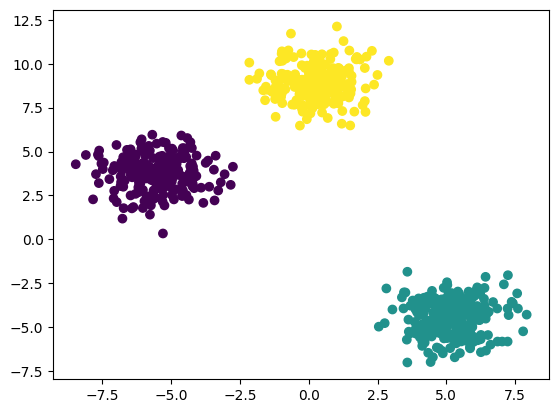

In [14]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [15]:
y_test_label=kmeans.predict(x_test)


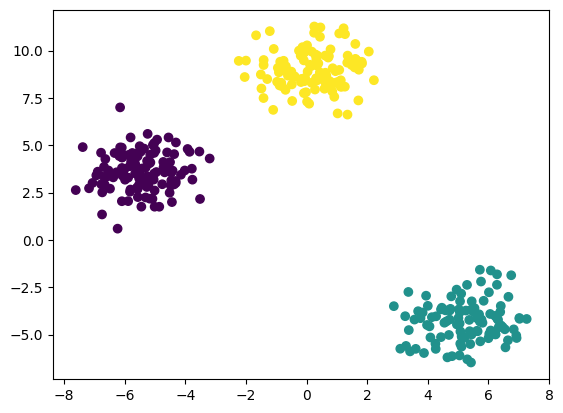

In [16]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

In [17]:
#for automated we use knee_locator
!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
kl=KneeLocator(range(1,10),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [20]:
#performance metrics
from sklearn.metrics import silhouette_score

In [21]:
silhouette_coeff=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_train)
  score=silhouette_score(x_train,kmeans.labels_)
  silhouette_coeff.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
silhouette_coeff

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3395506548196758,
 0.34575016442546685,
 0.34087163383497376,
 0.3437345931087302]

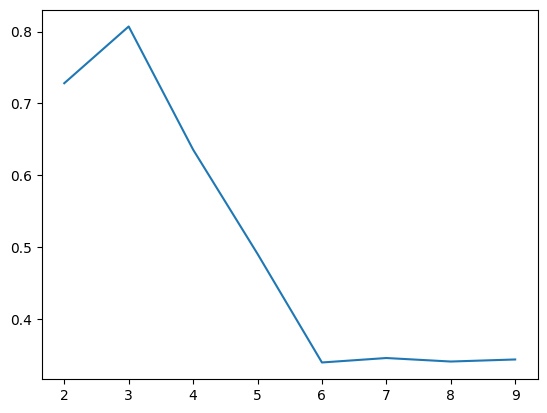

In [23]:
plt.plot(range(2,10),silhouette_coeff)



##hiearachial clustering

In [25]:
from sklearn import datasets

In [26]:
iris=datasets.load_iris()

In [27]:
import pandas as pd


In [28]:
iris_data=pd.DataFrame(iris.data)

In [29]:
iris_data.columns=iris.feature_names

In [30]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [35]:
x_scaled=scaler.fit_transform(iris_data)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=2)

In [39]:
pca

PCA(n_components=2)

In [40]:
pca_scaled=pca.fit_transform(x_scaled)

In [41]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

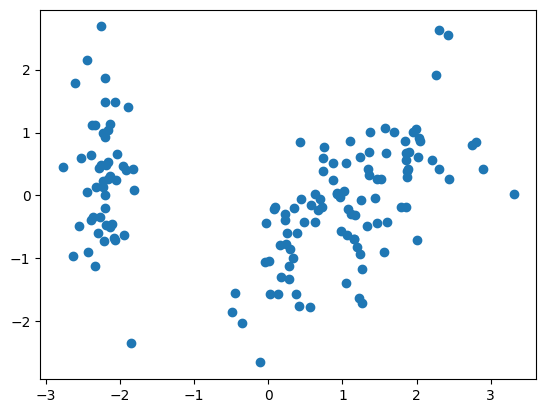

In [42]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Euclidean Distance')

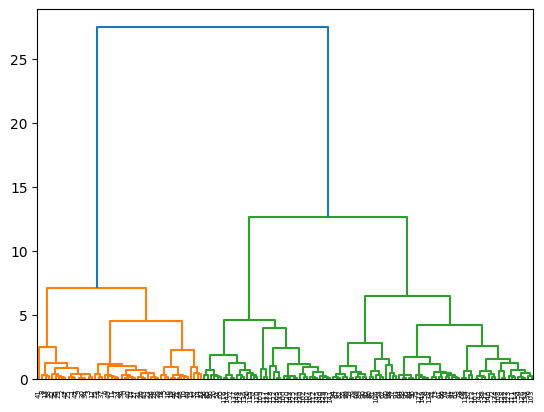

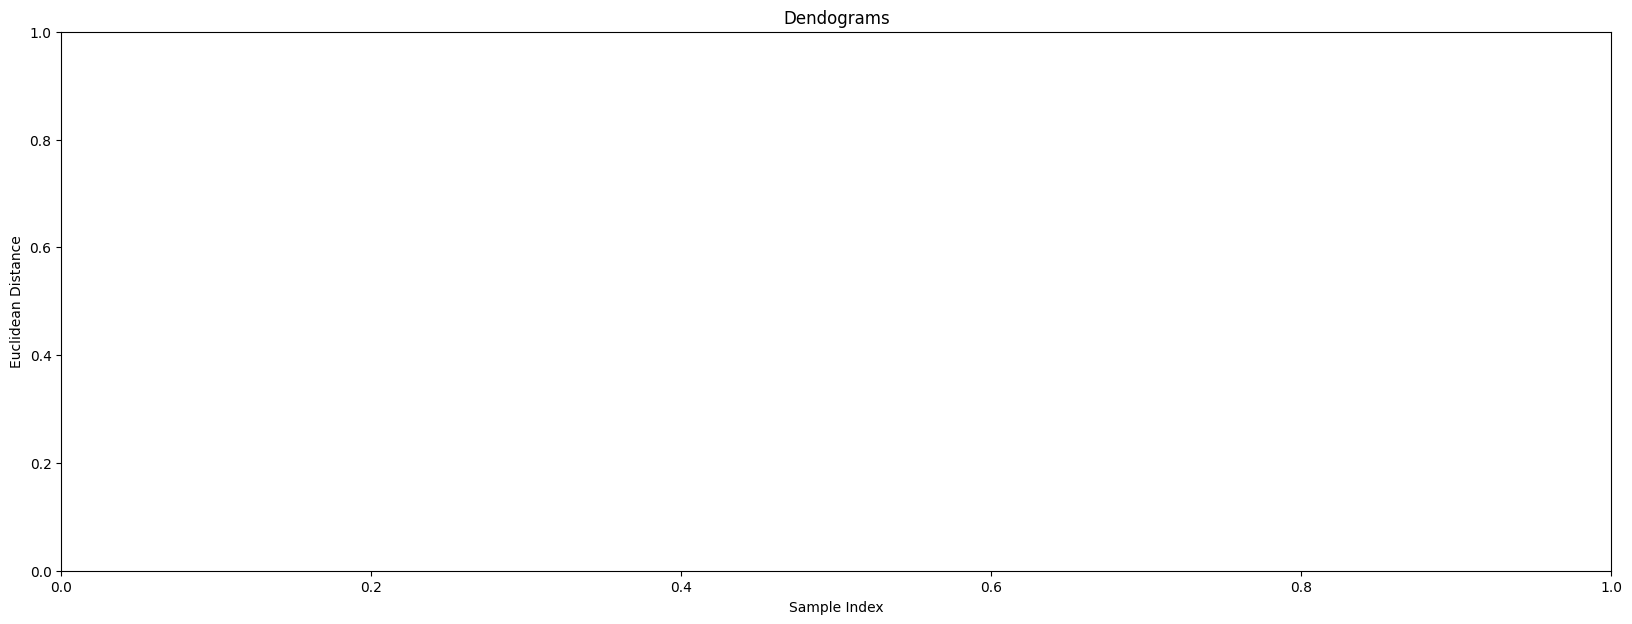

In [46]:
#agglometric clustering
import scipy.cluster.hierarchy as sc
#plot dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.figure(figsize=(20,7))
plt.title("Dendograms")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [48]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

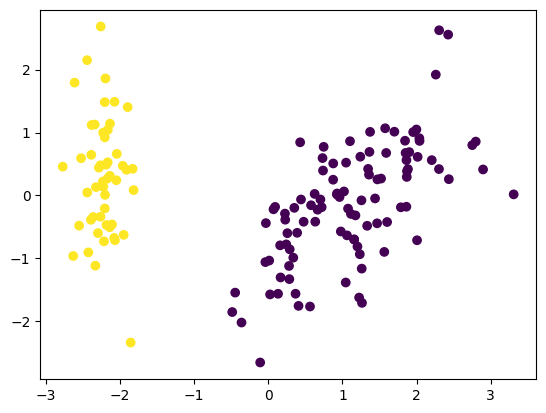

In [49]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [50]:
silhouette_coeff=[]
for k in range(2,10):
  silhouette=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
  silhouette.fit(pca_scaled)
  score=silhouette_score(pca_scaled,silhouette.labels_)
  silhouette_coeff.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [51]:
silhouette_coeff

[0.6145202036222636,
 0.5110595988738582,
 0.4487350420931284,
 0.4041689630951492,
 0.3672112889528299,
 0.37068206788578917,
 0.39305526067595453,
 0.41836944663173065]

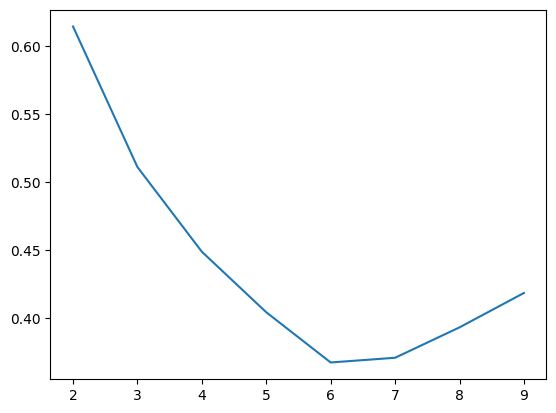

In [52]:
plt.plot(range(2,10),silhouette_coeff)

##DBSCAN Clustering

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
x,y=make_moons(n_samples=250,noise=0.05)

In [55]:
x

array([[ 9.01267197e-01, -5.26060344e-01],
       [ 1.82815359e+00, -3.75128276e-04],
       [ 4.09932190e-02,  9.91681674e-01],
       [ 1.15309307e-01,  1.86214061e-01],
       [ 1.75625360e+00, -1.59520529e-01],
       [ 1.94565654e+00,  3.13446348e-02],
       [ 1.20744830e+00, -4.97075756e-01],
       [ 1.01824144e+00,  7.47152118e-02],
       [-7.64891700e-01,  6.82541697e-01],
       [ 7.58290624e-01, -4.62376422e-01],
       [-1.54505309e-02,  3.50358194e-01],
       [ 1.07061948e+00, -5.37167923e-01],
       [ 2.02398511e+00,  4.47716467e-01],
       [ 8.35199106e-03,  4.37035539e-01],
       [ 7.11350959e-02,  3.81223738e-01],
       [-8.24444068e-01,  6.48337515e-01],
       [-5.06535472e-01,  8.15582171e-01],
       [-3.05985386e-01,  9.11843736e-01],
       [ 1.47740012e+00, -3.60545031e-01],
       [ 2.39821118e-01,  1.04592426e+00],
       [-5.58429474e-01,  7.59342140e-01],
       [ 1.89595684e+00,  2.04221547e-01],
       [ 1.75359746e-01,  9.33907093e-01],
       [ 1.

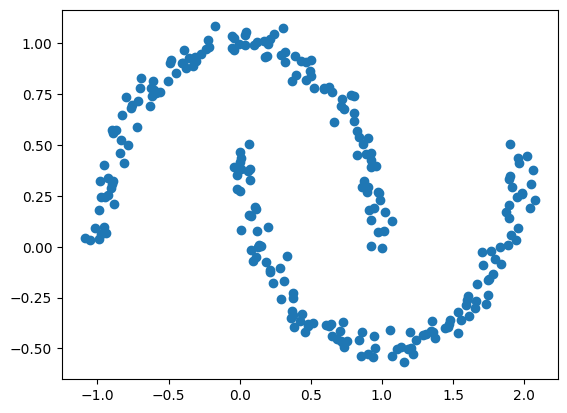

In [56]:
plt.scatter(x[:,0],x[:,1])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
x_scaled=scaler.fit_transform(x)

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
dbcan=DBSCAN(eps=0.5)

In [61]:
dbcan.fit(x_scaled)

DBSCAN()

In [63]:
dbcan.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1])

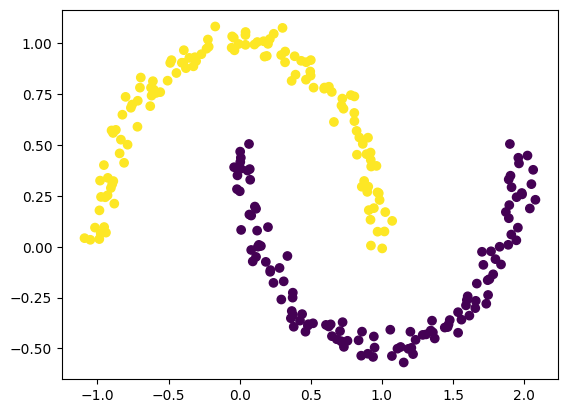

In [66]:
plt.scatter(x[:,0],x[:,1],c=dbcan.labels_)

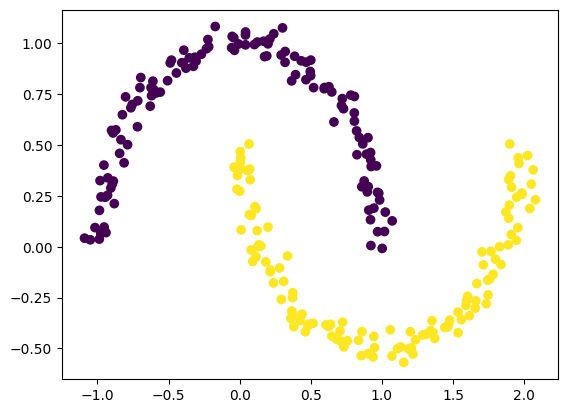

In [67]:
plt.scatter(x[:,0],x[:,1],c=y)